# INDIVIDUAL PROJECT - Mathematical Modelling for Machine Learning

In this notebook I will analyse and compare the perfomance k-NearestNeighbors algorithm and Random Forest algorithm. In the end, after training, I will choose one of the algorithm with its optimal set of parameters to predict on the test data. I have also included a Neural Network to see how would its performance compare with the mandatory algorithms.

The datast consists of:
- 1300 samples;
- 20 features.
  
There are 3 possible labels: {0,1,2}.

## LIBRARIES AND DATASETS

All the necessary libraries and datasets are imported in this section.

In [7]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns 
import time

import sklearn
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold, learning_curve, cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

np.random.seed(42)

In [8]:
data=pd.read_csv("mldata_0003260547.csv")
data_test=pd.read_csv("mldata_0003260547.TEST_FEATURES.csv")

print(data.shape, data_test.shape)

(1300, 22) (1300, 21)


## EXPLORATORY DATA ANALYSIS 

I begin with the exploration of the datesets, the first few cell are just to get an idea of what I am working with.

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1300 non-null   int64  
 1   label       1300 non-null   int64  
 2   feature_1   1300 non-null   float64
 3   feature_2   1300 non-null   float64
 4   feature_3   1300 non-null   float64
 5   feature_4   1300 non-null   float64
 6   feature_5   1300 non-null   float64
 7   feature_6   1300 non-null   float64
 8   feature_7   1300 non-null   float64
 9   feature_8   1300 non-null   float64
 10  feature_9   1300 non-null   float64
 11  feature_10  1300 non-null   float64
 12  feature_11  1300 non-null   float64
 13  feature_12  1300 non-null   float64
 14  feature_13  1300 non-null   float64
 15  feature_14  1300 non-null   float64
 16  feature_15  1300 non-null   float64
 17  feature_16  1300 non-null   float64
 18  feature_17  1300 non-null   float64
 19  feature_18  1300 non-null  

In [12]:
data.describe()

,Unnamed: 0,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,...,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000
mean,649.500000,0.989231,0.145989,0.127849,0.036569,0.427830,0.066409,0.072916,-0.217589,0.101645,...,0.230120,0.068246,-0.495080,-0.594764,0.008387,-0.281323,-0.220420,0.498112,0.013663,0.056449
std,375.421985,0.822064,0.988476,0.994295,3.672610,1.980816,0.991718,1.031481,1.956314,0.992335,...,2.047738,2.016963,2.112469,1.975955,2.758218,2.473050,4.091609,1.972085,0.998982,1.001451
min,0.000000,0.000000,-3.516325,-3.561334,-15.842076,-6.548879,-3.331830,-3.689727,-6.359209,-3.673527,...,-6.357986,-6.338117,-6.497195,-7.807793,-8.216892,-8.603465,-16.079384,-8.684190,-2.862870,-3.318701
25%,324.750000,0.000000,-0.501808,-0.541673,-2.406228,-0.839903,-0.559787,-0.614919,-1.587896,-0.597504,...,-1.139428,-1.291756,-1.819321,-1.969109,-1.833788,-1.852143,-2.877089,-0.710517,-0.693811,-0.622799
50%,649.500000,1.000000,0.137603,0.144385,0.178580,0.494314,0.045731,0.097585,-0.175916,0.163898,...,0.273703,0.058872,-0.469672,-0.548106,-0.031086,-0.213771,-0.132795,0.533068,0.001527,0.054822
75%,974.250000,2.000000,0.824736,0.787827,2.519423,1.765274,0.741944,0.757732,1.096976,0.753178,...,1.572213,1.346832,0.845973,0.726560,1.979820,1.295587,2.357482,1.786423,0.692207,0.724075
max,1299.000000,2.000000,3.323001,3.781364,11.067842,6.712514,3.814232,2.965083,6.327696,3.748887,...,6.266049,6.150005,6.262742,5.339398,8.046901,9.718062,16.667410,6.788690,3.255092,3.805132


In [13]:
data.head()

,Unnamed: 0,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20
0,0,2,-1.876633,0.612313,-1.454413,0.083127,0.811797,-0.058648,1.743833,1.085941,...,1.303835,-0.311516,0.224286,0.069879,-2.205371,-3.522443,-5.890766,1.652568,0.706855,0.897721
1,1,2,0.207516,-0.494046,5.808371,2.326813,-0.553174,1.287520,1.276151,0.954706,...,0.733255,-3.076478,1.905027,-1.700790,3.492330,-1.397852,1.246941,0.161971,0.450184,-0.595418
2,2,2,1.033750,-1.037784,-7.123122,-1.081289,-0.955206,-1.331004,-0.272870,-0.338266,...,0.353939,5.838817,0.433962,0.125762,-2.716632,0.115717,-2.012910,0.147608,-0.259018,-1.351894
3,3,0,1.798031,1.252469,-3.359008,-2.320638,-1.058333,-0.391600,-6.359209,0.634830,...,-0.298516,1.367394,-5.299456,-5.256252,-3.880325,2.137946,5.792677,2.672329,-0.031499,-0.074017
4,4,1,-1.329343,-1.048820,1.952959,0.346263,-2.329692,0.060032,1.705544,-0.055756,...,-1.479435,-1.134655,-0.803470,-1.104253,0.522195,-1.898465,1.454713,-0.049158,0.087485,0.683373


Drop the index column because a Pandas dataframe is already indexed.

In [15]:
data.drop(data.columns[0], axis=1, inplace=True)
print(data.columns)

Index(['label', 'feature_1', 'feature_2', 'feature_3', 'feature_4',
       'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9',
       'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14',
       'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19',
       'feature_20'],
      dtype='object')


Rename the columns of the dataset from 'feature_i' to 'Fi'. It was mainly an esthetical move, because in this format features are more easily readable.

In [17]:
for i in range(1,21):
    data.rename(columns={f'feature_{i}': f'F{i}'}, inplace=True)
print(data.columns)

Index(['label', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6', 'F7', 'F8', 'F9', 'F10',
       'F11', 'F12', 'F13', 'F14', 'F15', 'F16', 'F17', 'F18', 'F19', 'F20'],
      dtype='object')


In [18]:
data.dtypes.value_counts()

float64    20
int64       1
Name: count, dtype: int64

Here I do an analysis over the distributions of labels, to see if any augmentation/reduction is needed, but luckly they are almost equally distributed.

In [20]:
print(data['label'].value_counts(), "\n"*2, "PERCENTAGES:") 
for i in range(0,3):
    print(round(data['label'].value_counts()[i]/len(data) * 100,2), f'% of the dataset is {i}.')

label
0    446
2    432
1    422
Name: count, dtype: int64 

 PERCENTAGES:
34.31 % of the dataset is 0.
32.46 % of the dataset is 1.
33.23 % of the dataset is 2.


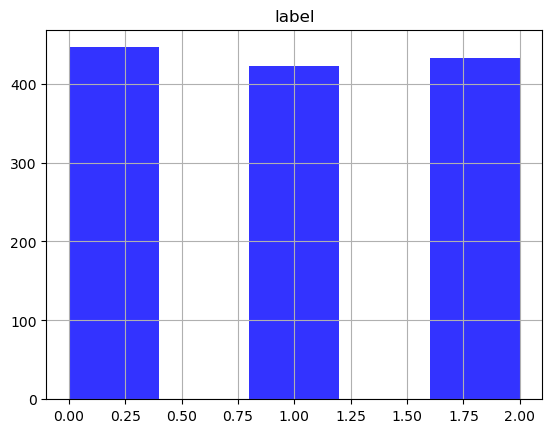

In [21]:
data.hist('label', bins=5, facecolor='blue', alpha=0.80);

I see that all of the features have an almost symmetrical normal distribution centered at 0.

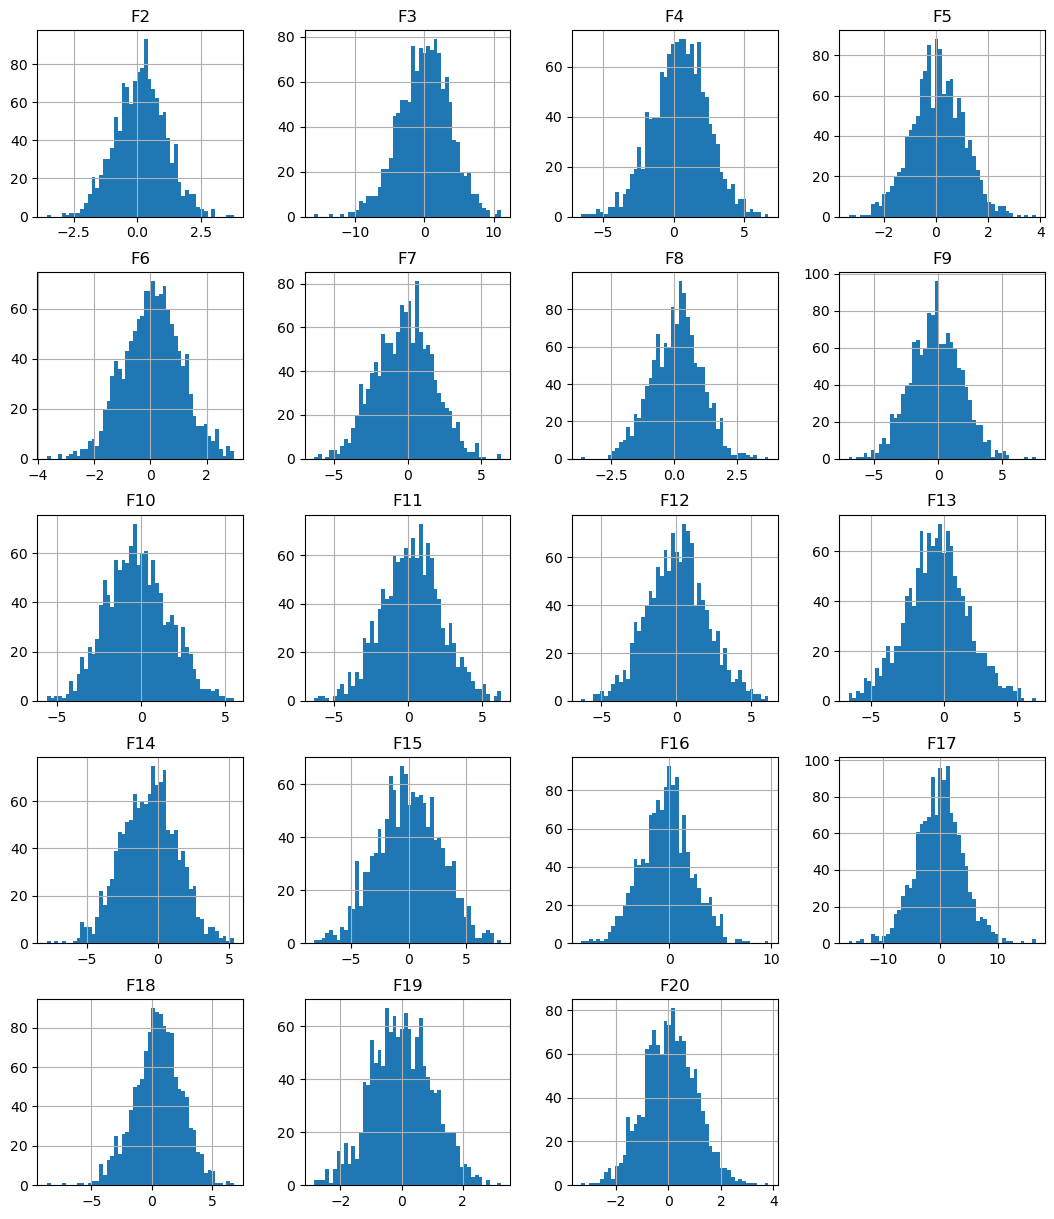

In [23]:
data[data.columns[2:]].hist(bins=50, figsize=(13, 15));

I observe that the min/max of each feature tend to be similar and the mean is usually around 0, while standard deviation tend to vary.

In [25]:
features=data.columns[1:]
data[features].describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000
mean,0.145989,0.127849,0.036569,0.427830,0.066409,0.072916,-0.217589,0.101645,-0.193166,-0.224264,0.230120,0.068246,-0.495080,-0.594764,0.008387,-0.281323,-0.220420,0.498112,0.013663,0.056449
std,0.988476,0.994295,3.672610,1.980816,0.991718,1.031481,1.956314,0.992335,1.982150,1.848706,2.047738,2.016963,2.112469,1.975955,2.758218,2.473050,4.091609,1.972085,0.998982,1.001451
min,-3.516325,-3.561334,-15.842076,-6.548879,-3.331830,-3.689727,-6.359209,-3.673527,-6.960927,-5.607275,-6.357986,-6.338117,-6.497195,-7.807793,-8.216892,-8.603465,-16.079384,-8.684190,-2.862870,-3.318701
25%,-0.501808,-0.541673,-2.406228,-0.839903,-0.559787,-0.614919,-1.587896,-0.597504,-1.569710,-1.512999,-1.139428,-1.291756,-1.819321,-1.969109,-1.833788,-1.852143,-2.877089,-0.710517,-0.693811,-0.622799
50%,0.137603,0.144385,0.178580,0.494314,0.045731,0.097585,-0.175916,0.163898,-0.185255,-0.315398,0.273703,0.058872,-0.469672,-0.548106,-0.031086,-0.213771,-0.132795,0.533068,0.001527,0.054822
75%,0.824736,0.787827,2.519423,1.765274,0.741944,0.757732,1.096976,0.753178,1.145849,0.994758,1.572213,1.346832,0.845973,0.726560,1.979820,1.295587,2.357482,1.786423,0.692207,0.724075
max,3.323001,3.781364,11.067842,6.712514,3.814232,2.965083,6.327696,3.748887,7.583245,5.489205,6.266049,6.150005,6.262742,5.339398,8.046901,9.718062,16.667410,6.788690,3.255092,3.805132


There are no duplicates in the dataset.

In [27]:
data.duplicated().sum()

0

There are no missing values.

In [29]:
data.isnull().sum().max()

0

Next we move on to check for outliers. Each feature has around 1%, so there is no need of further investigations or removals beacuse they are already insignificant.

In [31]:
outlier_check = data[data.columns[1:]]
Q1 = outlier_check.quantile(0.25)
Q3 = outlier_check.quantile(0.75)
IQR = Q3 - Q1

outliers = ((outlier_check < (Q1 - 1.5 * IQR)) | (outlier_check > (Q3 + 1.5 * IQR)))
outlier_counts = outliers.sum()

print('Outlier percentages: \n', (outlier_counts / len(outlier_check)) * 100)

Outlier percentages: 
 F1     0.769231
F2     0.923077
F3     0.846154
F4     1.153846
F5     0.923077
F6     0.846154
F7     0.461538
F8     0.692308
F9     0.692308
F10    0.615385
F11    0.923077
F12    0.769231
F13    1.230769
F14    0.538462
F15    0.230769
F16    1.076923
F17    1.615385
F18    1.000000
F19    0.384615
F20    0.846154
dtype: float64


Again, from the boxplot I see that each feature is indeed symmetric with little outliers. I can see that the variance changes from a feature to another so I will definetly have to scale it before any visualization.

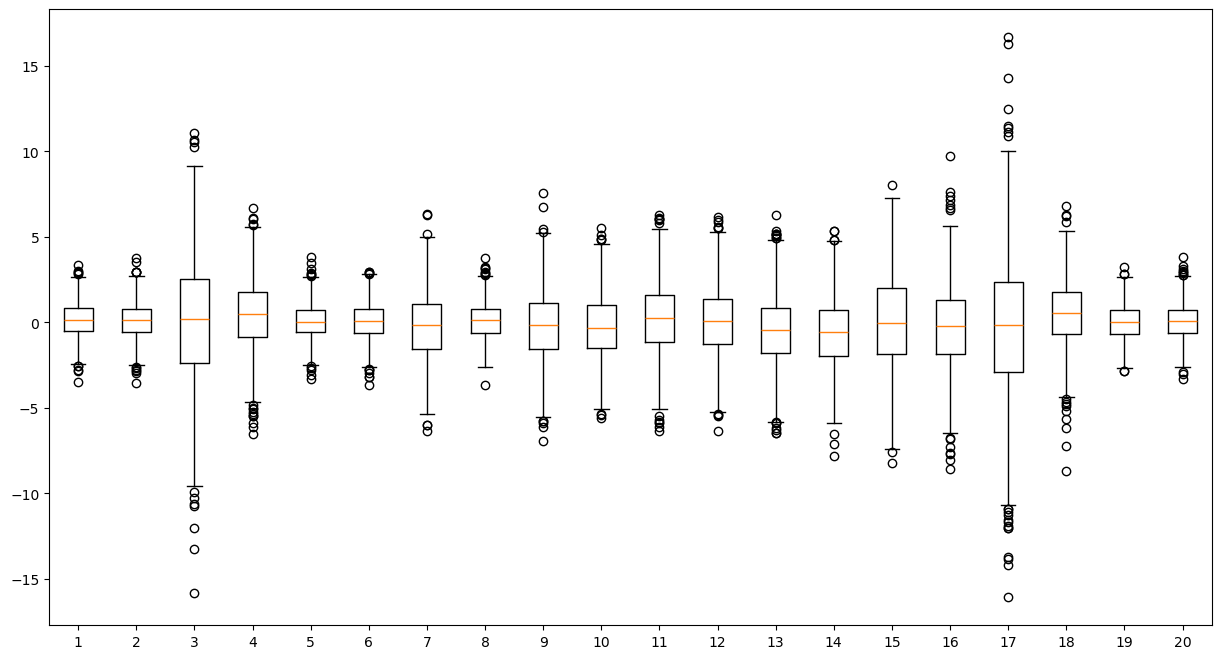

In [33]:
fig, axs = plt.subplots(1, figsize=(15,8))
plt.boxplot(data[features])
plt.show()

I continue with the correlation matrix, to have an overall picture of the relationship between features.

In [35]:
corr_matrix = data.corr(numeric_only=True) 

In [36]:
corr_matrix["label"].sort_values(ascending=False)

label    1.000000
F11      0.142609
F14      0.132021
F16      0.097221
F12      0.096495
F15      0.051725
F6       0.010349
F18      0.010029
F5       0.009204
F20     -0.000744
F2      -0.010568
F8      -0.012716
F19     -0.021040
F1      -0.027407
F7      -0.027845
F4      -0.035917
F10     -0.100719
F9      -0.119328
F13     -0.123170
F17     -0.125993
F3      -0.248928
Name: label, dtype: float64

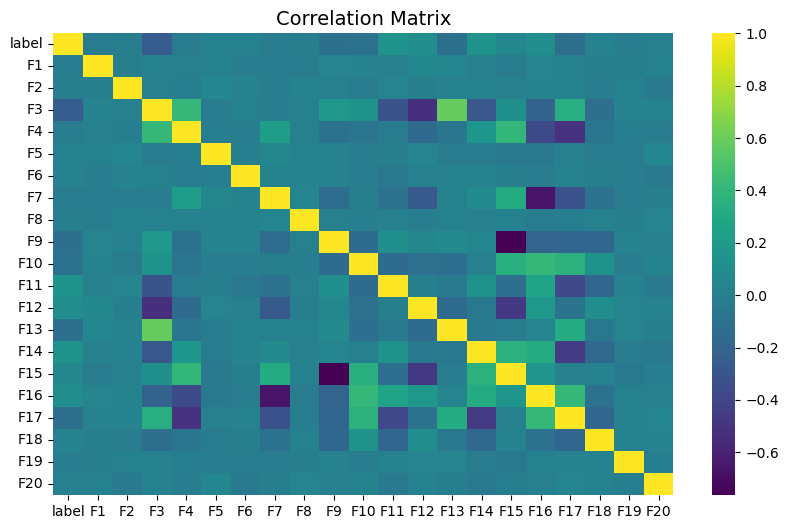

In [37]:
f, ax = plt.subplots(figsize=(10,6))

sns.heatmap(corr_matrix, cmap='viridis', annot_kws={'size':20}, ax=ax)
ax.set_title("Correlation Matrix", fontsize=14)

plt.show()

I observe the strongest negative correlation between F16 an F7, so I plotted it to get an idea of how they are distributed. Overall, there are no particularly strong correlations in the matrix between features(neither positive, nor negative). 

F16 vs F7: -0.6687650466562861


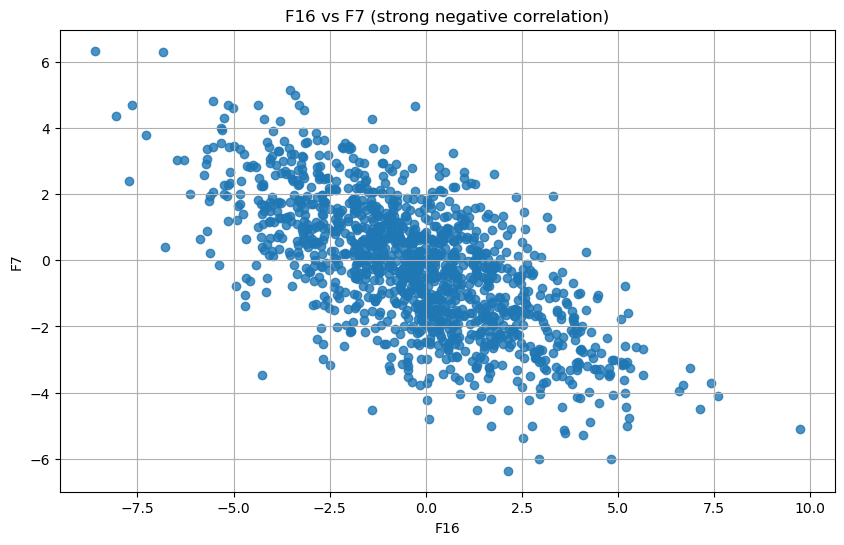

In [39]:
correlation = data['F16'].corr(data['F7'])  
print(f"F16 vs F7: {correlation}")

plt.figure(figsize=(10, 6))
plt.scatter(data['F16'], data['F7'], alpha=0.8)
plt.title('F16 vs F7 (strong negative correlation)')
plt.xlabel('F16')
plt.ylabel('F7')
plt.grid()
plt.show()

As I said before, the variance was different from a fearure to another, so I performed standardization on the the data with the help of StandardScale function. Now each feature has mean 0 and std 1.

In [41]:
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data[features]), columns=features)
data_scaled['label'] = data['label']
data_scaled.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,label
count,1.300000e+03,1.300000e+03,1.300000e+03,1.300000e+03,1.300000e+03,1.300000e+03,1.300000e+03,1.300000e+03,1.300000e+03,1.300000e+03,...,1.300000e+03,1.300000e+03,1.300000e+03,1.300000e+03,1.300000e+03,1.300000e+03,1.300000e+03,1.300000e+03,1.300000e+03,1300.000000
mean,-6.490535e-18,1.708035e-17,-8.198570e-18,1.639714e-17,2.391250e-18,-1.981321e-17,-1.093143e-17,-3.552714e-17,5.465713e-18,-5.465713e-18,...,2.049643e-17,-4.099285e-17,2.186285e-17,2.459571e-17,-2.049643e-17,1.093143e-17,2.459571e-17,-2.186285e-17,-1.639714e-17,0.989231
std,1.000385e+00,1.000385e+00,1.000385e+00,1.000385e+00,1.000385e+00,1.000385e+00,1.000385e+00,1.000385e+00,1.000385e+00,1.000385e+00,...,1.000385e+00,1.000385e+00,1.000385e+00,1.000385e+00,1.000385e+00,1.000385e+00,1.000385e+00,1.000385e+00,1.000385e+00,0.822064
min,-3.706438e+00,-3.711778e+00,-4.325196e+00,-3.523494e+00,-3.427936e+00,-3.649210e+00,-3.140591e+00,-3.805799e+00,-3.415667e+00,-2.912892e+00,...,-3.177465e+00,-2.842373e+00,-3.651806e+00,-2.983246e+00,-3.366428e+00,-3.877464e+00,-4.657930e+00,-2.880572e+00,-3.371558e+00,0.000000
25%,-6.556020e-01,-6.736227e-01,-6.653952e-01,-6.402517e-01,-6.316689e-01,-6.670986e-01,-7.007226e-01,-7.048213e-01,-6.947373e-01,-6.973694e-01,...,-6.745416e-01,-6.271103e-01,-6.958020e-01,-6.681426e-01,-6.354198e-01,-6.495468e-01,-6.131042e-01,-7.084680e-01,-6.785259e-01,0.000000
50%,-8.487477e-03,1.663738e-02,3.868237e-02,3.357702e-02,-2.085908e-02,2.392542e-02,2.131042e-02,6.275807e-02,3.992575e-03,-4.931512e-02,...,-4.649614e-03,1.203215e-02,2.362189e-02,-1.431643e-02,2.732575e-02,2.142410e-02,1.773233e-02,-1.215350e-02,-1.625640e-03,1.000000
75%,6.869246e-01,6.640206e-01,6.763064e-01,6.754585e-01,6.814382e-01,6.641707e-01,6.722187e-01,6.568185e-01,6.757964e-01,6.596458e-01,...,6.341602e-01,6.350716e-01,6.689586e-01,7.150239e-01,6.378829e-01,6.302885e-01,6.535247e-01,6.794966e-01,6.669149e-01,2.000000
max,3.215288e+00,3.675893e+00,3.004817e+00,3.173996e+00,3.780576e+00,2.804976e+00,3.347011e+00,3.676830e+00,3.924730e+00,3.091713e+00,...,3.016466e+00,3.200247e+00,3.004342e+00,2.915508e+00,4.044897e+00,4.129018e+00,3.191038e+00,3.245981e+00,3.744693e+00,2.000000


In [42]:
data_scaled.head() 

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F12,F13,F14,F15,F16,F17,F18,F19,F20,label
0,-2.046991,0.487431,-0.406130,-0.174088,0.751902,-0.127598,1.002997,0.992281,0.973612,-1.165478,...,-0.188356,0.340664,0.336495,-0.802913,-1.311080,-1.386381,0.585624,0.694165,0.840376,2
1,0.062268,-0.625704,1.572185,0.959056,-0.624998,1.177987,0.763842,0.859981,-0.855172,0.293023,...,-1.559738,1.136599,-0.559958,1.263600,-0.451652,0.358765,-0.170515,0.437133,-0.651173,2
2,0.898456,-1.172772,-1.950233,-0.762160,-1.030543,-1.361596,-0.028269,-0.443480,-0.627323,-1.826958,...,2.862121,0.439959,0.364787,-0.988344,0.160608,-0.438258,-0.177801,-0.273064,-1.406845,2
3,1.671945,1.131509,-0.924924,-1.388077,-1.134571,-0.450512,-3.140591,0.537510,-0.286685,-0.536393,...,0.644359,-2.275170,-2.360014,-1.410406,0.978629,1.470182,1.102920,-0.045226,-0.130327,0
4,-1.493107,-1.183876,0.522007,-0.041194,-2.417041,-0.012496,0.983417,-0.158678,0.312530,0.887291,...,-0.596622,-0.146042,-0.257944,0.186354,-0.654158,0.409564,-0.277615,0.073926,0.626256,1


## PCA implementation

I apply a dimensionality reduction technique to try to understand the data better, maybe the visualizations will give me some insigth.

### 2 components 

I start with a reduction to 2 dimensions, to ee if I could find some interesting behavior. Unfortunatelly the explain variance is only 25%, which is too low.

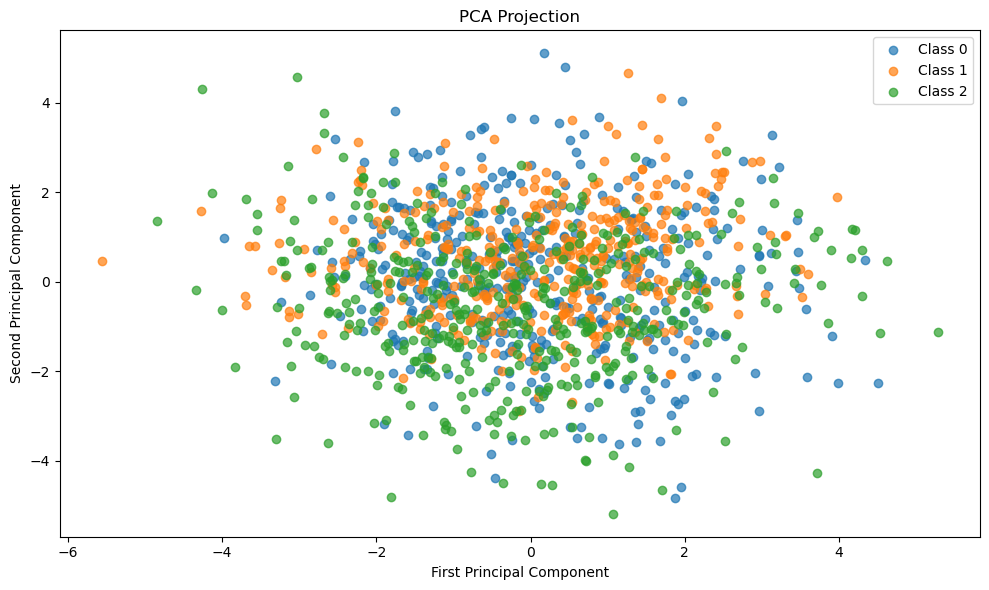

Total variance explained 0.25


In [47]:
pca = PCA(n_components=2)
data_pca_1 = pd.DataFrame(pca.fit_transform(data_scaled[features]))
data_pca_1['label'] = data['label']
data_pca_1.columns = ['PC1', 'PC2', 'label']

plt.figure(figsize=(10, 6))
for label in sorted(data_pca_1['label'].unique()):
    idx = data_pca_1['label'] == label
    plt.scatter(data_pca_1.loc[idx, 'PC1'], data_pca_1.loc[idx, 'PC2'], label=f'Class {label}', alpha=0.7)


plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('PCA Projection')
plt.legend()
plt.tight_layout()
plt.show()


print(f"Total variance explained {sum(pca.explained_variance_ratio_):.2f}")

In [48]:
data_pca_1.head()

,PC1,PC2,label
0,0.471389,-2.325000,2
1,2.609597,1.537081,2
2,-2.257559,-1.989499,2
3,-3.977670,0.976806,0
4,1.132254,0.803879,1


### 3 components 

As well as in the previous case, the explained variance percentage is low(36%), and the data doesn't seem to be linearly separable in the 3D graph.

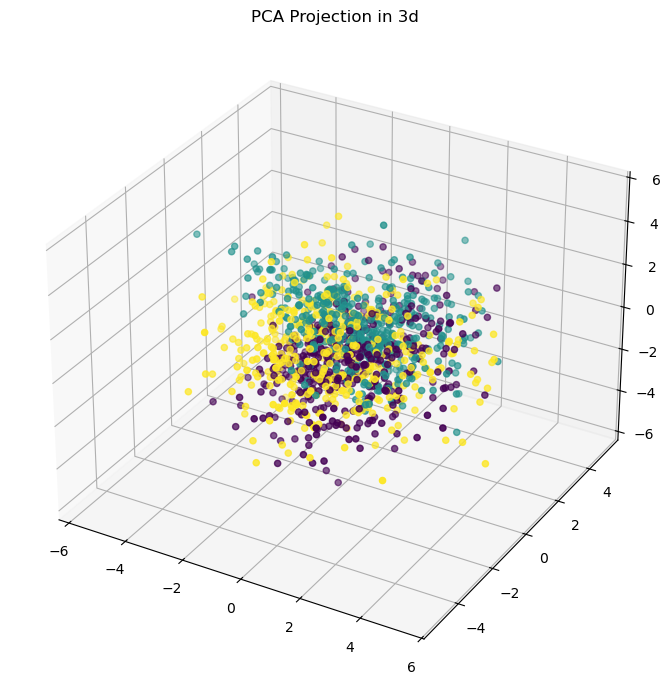

Total variance explained 0.36


In [51]:
pca = PCA(n_components=3)
data_pca_2 = pd.DataFrame(pca.fit_transform(data_scaled[features]))
data_pca_2['label'] = data['label']

fig = plt.figure(figsize=(8, 7))
ax = fig.add_subplot(projection='3d')
ax.scatter(data_pca_2[0], data_pca_2[1], data_pca_2[2], c=data_pca_2['label'])

plt.title('PCA Projection in 3d')
plt.tight_layout()
plt.show()

print(f"Total variance explained {sum(pca.explained_variance_ratio_):.2f}")

In [52]:
data_pca_2.head()

,0,1,2,label
0,0.471389,-2.325000,-1.285220,2
1,2.609597,1.537081,-0.475792,2
2,-2.257559,-1.989499,0.421596,2
3,-3.977670,0.976806,0.044273,0
4,1.132254,0.803879,-0.443260,1


### 95% of variance explained

In the end I checked, out of curiosity, how many features would be needed for a 95% explained variance.

In [55]:
pca = PCA(n_components=0.95)
data_pca_3 = pd.DataFrame(pca.fit_transform(data_scaled[features]))
data_pca_3['label'] = data['label']

print(f"Number of components included: {pca.n_components_}")
print(f"Variance explained {sum(pca.explained_variance_ratio_):.2f}")
data_pca_3.head()

Number of components included: 15
Variance explained 0.97


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,label
0,0.471389,-2.325000,-1.285220,0.249758,0.961075,-0.410166,-2.078401,-0.876661,-0.145986,-0.276620,0.494522,-0.547136,0.031359,0.518306,1.190482,2
1,2.609597,1.537081,-0.475792,-0.604452,-0.268981,-1.053703,-0.056647,-0.686797,0.159694,1.044419,-0.203462,0.204797,0.515573,0.814315,-0.846004,2
2,-2.257559,-1.989499,0.421596,0.488470,-1.183090,-0.175394,0.777153,0.728031,-0.721380,1.615781,-1.934434,-0.712527,0.853024,-2.131355,0.469320,2
3,-3.977670,0.976806,0.044273,1.864597,-0.908766,-0.280305,-0.224546,1.000575,1.439622,-0.234612,-0.985826,0.553822,-1.084382,-0.057987,-2.306193,0
4,1.132254,0.803879,-0.443260,0.512331,-0.946783,-0.159180,-0.074680,-2.497149,-1.196540,-0.271209,-0.315171,0.246279,-1.421811,-0.675007,0.160058,1


## TRAINING

I start the training with the suggested models, in the end experimenting a little with a neural network, which I am not going to use in the final predictions.

### K NEAREST NEIGHBORS - 72% ACCURACY

I will initiate with a K-nearest neighbors classifier, focusing on tunning the hyperparameters in the right way for the best accuracy.

Hyperparameters:
- number of neighbors: how many neighbors the algorithm will take into account for the classification;
- weights: wether or not to weight the vote of each neighbor based on how far it is from the datapoint;
- metric: allows you to specify the actual metric to use when computing the k neighbors, some examples are: Manhattan, Euclidean, Chebyshev, etc.

To find the optimal parameters, I will use a Gridsearch, which exhaustively searches over specified parameter values for an estimator and evaluates each combination using cross-validation. I choose to do it this way, because with our dataset, the computations are not that heavy.

In [60]:
X= data.drop('label', axis=1)
y = data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)

(1040, 20) (1040,)


In [61]:
%%time

pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('select', SelectKBest(score_func=f_classif)),
    ('knn', KNeighborsClassifier())
])

param_grid = {
    'select__k': [5, 10, 15, 20],
    'knn__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17], 
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'cosine']
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(pipe, param_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

best_knn = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits
Best parameters: {'knn__metric': 'cosine', 'knn__n_neighbors': 13, 'knn__weights': 'distance', 'select__k': 10}
Best cross-validation accuracy: 0.7240384615384616
CPU times: user 445 ms, sys: 122 ms, total: 566 ms
Wall time: 3.9 s


After the gridsearch I find that the best parameters are: {'knn__metric': 'cosine', 'knn__n_neighbors': 13, 'knn__weights': 'distance', 'select__k': 10}, with a cv accuracy of 72%, which is not ideal, but not bad either. While I was writting the notebook I have also experimented with the number of splits during cross validation and I come to the conclusion that 5 give me the best tradeoff between right-fitting and acccuracy. In the cell below, I plotted the evolution of accuracy with respect to the number of neighbors.

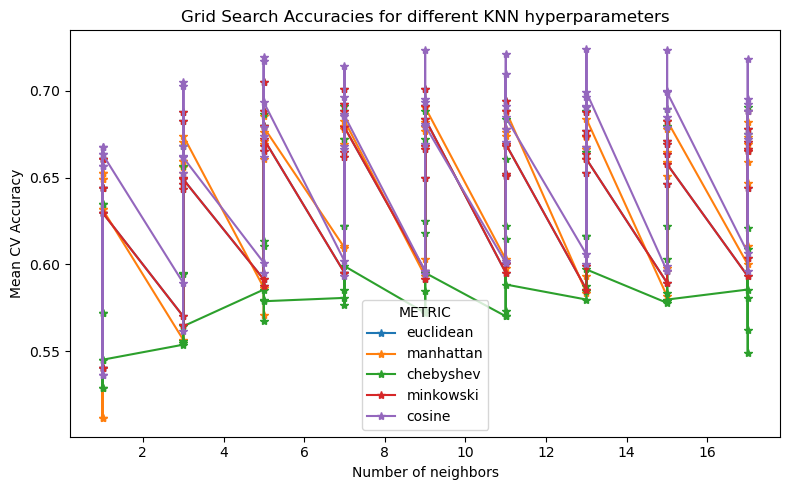

In [63]:
results = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(8,5))
for metric in results['param_knn__metric'].unique():
    subset = results[results['param_knn__metric'] == metric]
    plt.plot(
        subset['param_knn__n_neighbors'], 
        subset['mean_test_score'], 
        marker='*', 
        label=metric
    )

plt.xlabel('Number of neighbors')
plt.ylabel('Mean CV Accuracy')
plt.title('Grid Search Accuracies for different KNN hyperparameters')
plt.legend(title='METRIC')
plt.tight_layout()
plt.show()

Looking at the Learning Curve of the model, I observe that the training accuracy of the model is always 100, while the validation accuracy is gradually growing with the training set size. KNN (with low k) can achieve 100% training accuracy because they memorize or overfit the training data, but this doesn’t guarantee good performance on new, unseen data. In our case, the number of neighbors is 13, which is fairly high, so this likely means that our data lacks complexity.

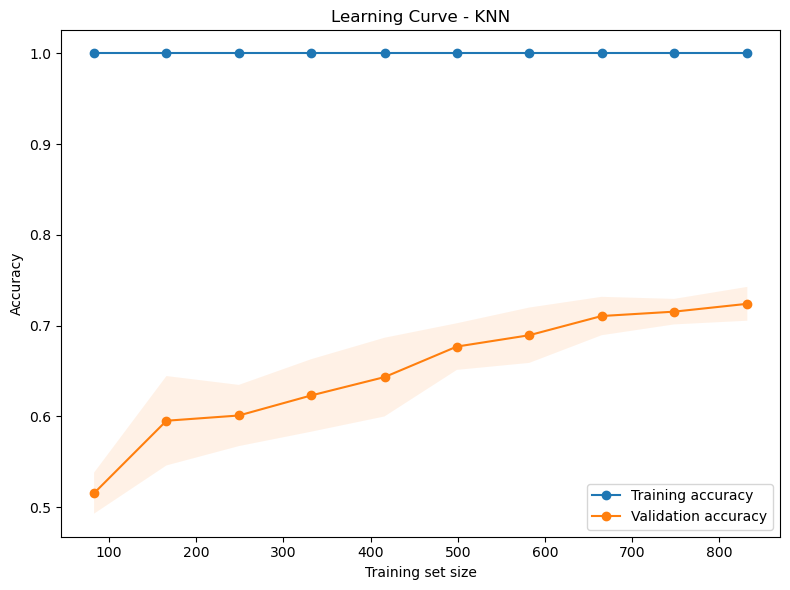

In [65]:
train_sizes, train_scores, val_scores = learning_curve(
    best_knn,
    X_train, y_train,
    cv=cv,                        
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),  
    n_jobs=-1                     
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, 'o-', label="Training accuracy")
plt.plot(train_sizes, val_mean, 'o-', label="Validation accuracy")
plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.1)
plt.fill_between(train_sizes, val_mean-val_std, val_mean+val_std, alpha=0.1)
plt.xlabel("Training set size")
plt.ylabel("Accuracy")
plt.title("Learning Curve - KNN")
plt.legend()
plt.tight_layout()
plt.show()

In [66]:
y_pred = best_knn.predict(X_test)
print("Test accuracy :", accuracy_score(y_test, y_pred))
print("Confusion mat:", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
cv_scores = cross_val_score(
    best_knn,          
    X_train,        
    y_train,         
    cv=cv,               
    scoring='accuracy'
)
print(f"CV accuracy  : {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Test accuracy : 0.7615384615384615
Confusion mat: [[65  8 10]
 [12 64  6]
 [14 12 69]]
              precision    recall  f1-score   support

           0       0.71      0.78      0.75        83
           1       0.76      0.78      0.77        82
           2       0.81      0.73      0.77        95

    accuracy                           0.76       260
   macro avg       0.76      0.76      0.76       260
weighted avg       0.76      0.76      0.76       260

CV accuracy  : 0.7240 ± 0.0186


Looking at our general resuts we see that the model is consistent with the initial observations.

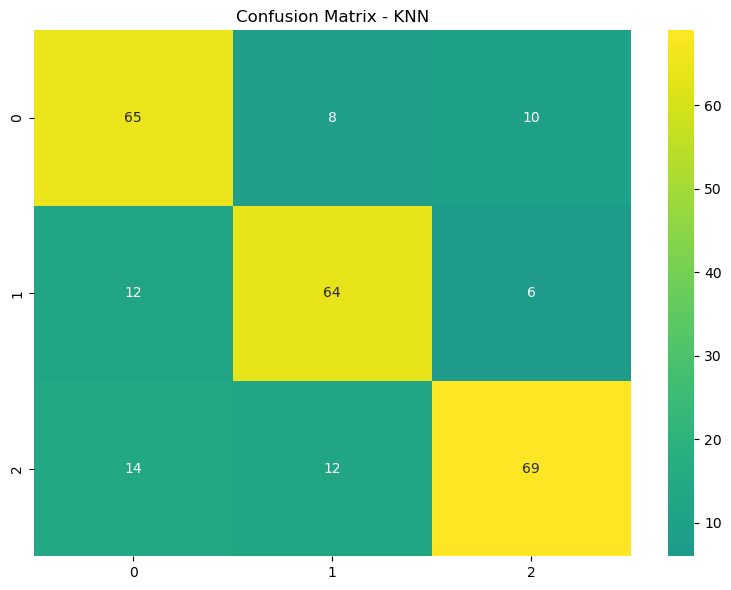

In [68]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(
    cm,
    annot=True,       
    cmap='viridis',    
    center=0            
)
plt.title('Confusion Matrix - KNN')
plt.tight_layout()
plt.show()

I tried to experiment with PCA a little, but clearly the accuracy drops significantly.

In [70]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
    ('knn', best_knn)
])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)
print("Pipeline Test accuracy:", accuracy_score(y_test, y_pred))

Pipeline Test accuracy: 0.5576923076923077


### Random Forest - 74% ACCURACY

I continue with the Random Forest classifier. I again start with the optimization of hyperparameters

Hyperparameters:
- number of estimators: the number of decision trees;
- criterion: the function used to measure the quality of a split;
- max_depth: the maximum depth of each tree;
- min_samples_split: the minimum number of samples required to split an internal node;
- max_features: the maximum number of features to look at in each split.
- bootstrap: wether to use bootstrap, or not.

Since it is more computationally expensive to try each combination of parameters in random forest, looping through multiple random searches would be too expensive. Therefore I use a gridsearch for the parameters I want to optimize.

The number of estimators influences directly the test accuracy. It's visible that the curve starts to flatten at 100 trees, so i choose to continue with the tuning including only 100 trees in the random forest.

In [74]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

param_range = np.array([1, 10, 50, 100, 500, 1000])
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

train_scores, test_scores = sklearn.model_selection.validation_curve(
    rf,
    X_train, y_train,
    param_name='n_estimators',
    param_range=param_range,
    cv=cv,
    n_jobs=-1
)

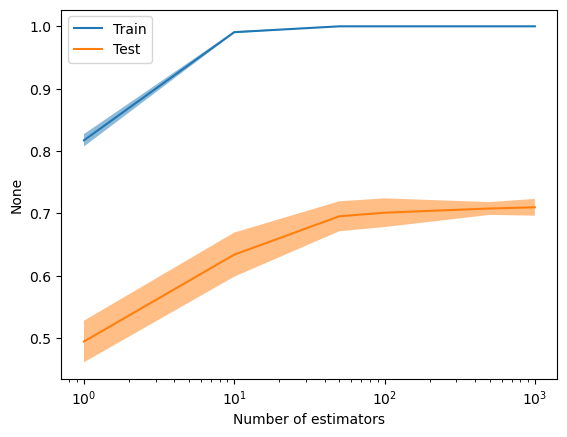

In [75]:
display = sklearn.model_selection.ValidationCurveDisplay(param_name='Number of estimators', param_range=param_range, train_scores=train_scores, test_scores=test_scores)
display.plot();

In [76]:
%%time

pipe_2 = Pipeline([
    ('scaler', StandardScaler()),
    ('rf', RandomForestClassifier(random_state=42))
])

parameter_grid = {
    'rf__n_estimators': [100],
    'rf__criterion': ['gini', 'entropy', 'log_loss'],
    'rf__max_depth': [None, 10, 20, 50, 100],
    'rf__min_samples_split': [2, 10],
    'rf__max_features': ['sqrt', 'log2', None],
    'rf__bootstrap': [True, False]
    }

cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

grid_search = GridSearchCV(pipe_2, parameter_grid, cv=cv, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits
Best parameters: {'rf__bootstrap': False, 'rf__criterion': 'gini', 'rf__max_depth': 20, 'rf__max_features': 'sqrt', 'rf__min_samples_split': 2, 'rf__n_estimators': 100}
Best cross-validation accuracy: 0.7413461538461539
CPU times: user 2.92 s, sys: 406 ms, total: 3.33 s
Wall time: 2min 39s


After the gridsearch I find that the best parameters are: {'rf__bootstrap': False, 'rf__criterion': 'gini', 'rf__max_depth': 20, 'rf__max_features': 'sqrt', 'rf__min_samples_split': 2, 'rf__n_estimators': 100}, with a cv accuracy of 74%, better than the previous one. While I was writting the notebook I, again, have also experimented with the number of splits during cross validation and I come to the conclusion that 10 give me the best tradeoff between right-fitting and acccuracy. In the cell below, I plotted the evolution of accuracy with respect to the max depth of each tree.

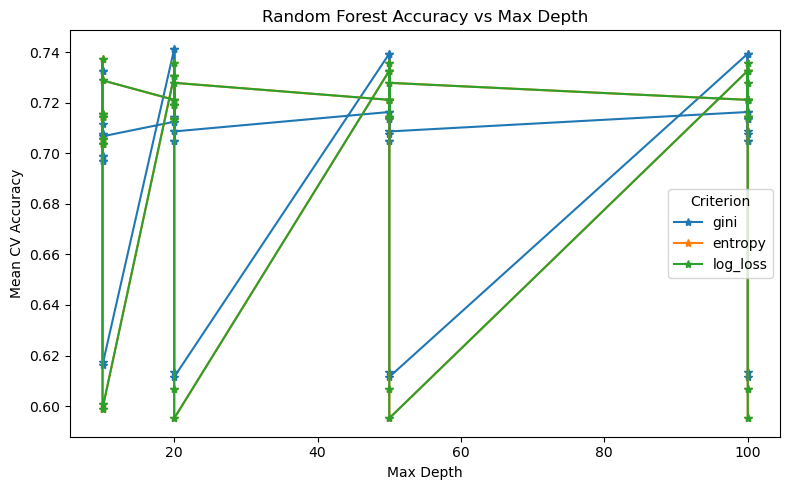

In [78]:
results = pd.DataFrame(grid_search.cv_results_)

plt.figure(figsize=(8,5))
for criterion in results['param_rf__criterion'].unique():
    subset = results[results['param_rf__criterion'] == criterion]
    plt.plot(
        subset['param_rf__max_depth'], 
        subset['mean_test_score'], 
        marker='*', 
        label=criterion
    )

plt.xlabel('Max Depth')
plt.ylabel('Mean CV Accuracy')
plt.title('Random Forest Accuracy vs Max Depth')
plt.legend(title='Criterion')
plt.tight_layout()
plt.show()


As in the previous case, again the training accuracy of the model is always 100, while the validation accuracy is gradually growing with the increase in the training set size. Random Forest, as well as KNN,  can achieve 100% training accuracy because they memorize or overfit the training data, but this doesn’t guarantee good performance on new, unseen data.

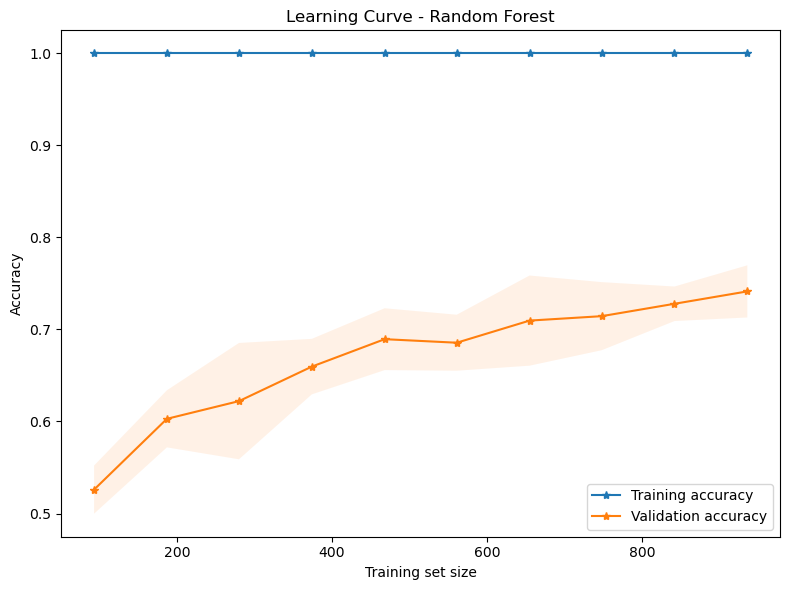

In [80]:
train_sizes, train_scores, val_scores = learning_curve(
    best_rf,
    X_train, y_train,
    cv=cv,                        
    scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10),  
    n_jobs=-1                     
)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, '*-', label="Training accuracy")
plt.plot(train_sizes, val_mean, '*-', label="Validation accuracy")
plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.1)
plt.fill_between(train_sizes, val_mean-val_std, val_mean+val_std, alpha=0.1)
plt.xlabel("Training set size")
plt.ylabel("Accuracy")
plt.title("Learning Curve - Random Forest")
plt.legend()
plt.tight_layout()
plt.show()

In [81]:
y_pred = best_rf.predict(X_test)
print("Test accuracy :", accuracy_score(y_test, y_pred))
print("Confusion mat:", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
cv_scores = cross_val_score(
    best_rf,          
    X_train,        
    y_train,         
    cv=cv,               
    scoring='accuracy'
)
print(f"CV accuracy  : {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Test accuracy : 0.7423076923076923
Confusion mat: [[67 10  6]
 [15 64  3]
 [17 16 62]]
              precision    recall  f1-score   support

           0       0.68      0.81      0.74        83
           1       0.71      0.78      0.74        82
           2       0.87      0.65      0.75        95

    accuracy                           0.74       260
   macro avg       0.75      0.75      0.74       260
weighted avg       0.76      0.74      0.74       260

CV accuracy  : 0.7413 ± 0.0283


We can see an improvement of +0.02 in the CV accuracy, compared the one we got for the KNN classifier. Overall, there is clearly a better performance.

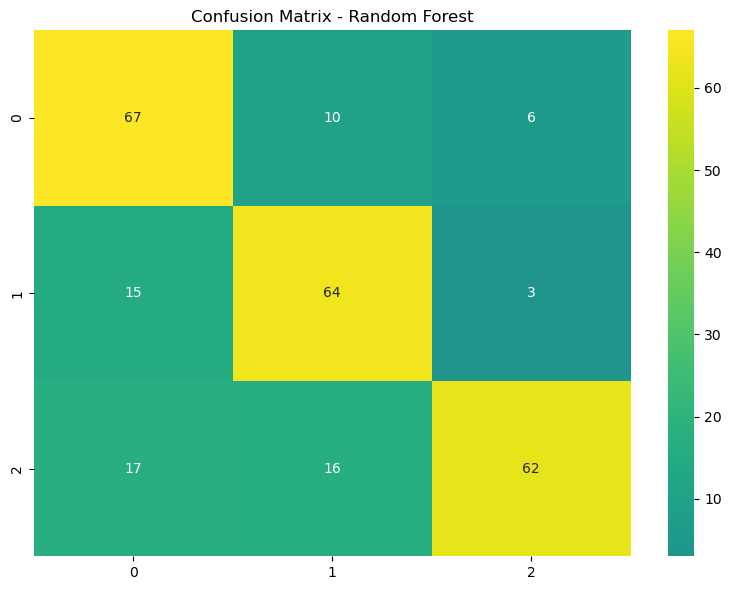

In [83]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(
    cm,
    annot=True,       
    cmap='viridis',    
    center=0            
)
plt.title('Confusion Matrix - Random Forest')
plt.tight_layout()
plt.show()

### Additional Model - Neural Network - 71% ACCURACY

I try to use a Neural Network as well, to see if the performance would increase. It becomes very computationally expensive to train Neural Networks as they become larger, so I tried to limit my search and experiment with just a couple of variants for each layers length. I perform grid search on the predefined set and 2 activation functions: rectified linear, and hyperbolic tangent.

After some testing, I decided to fix the maximum iterations to 2500, such that all cases converge, and the alpha to 1e-5.

In [86]:
%%time

pipe_3 = Pipeline([
    ('scaler', StandardScaler()),
    ('nn', MLPClassifier(solver='adam', alpha=1e-5, max_iter=2500, random_state=42)) 
])

param_grid = {
    'nn__hidden_layer_sizes': [
        # Single layer
        (10,), (20,), (50,), (100,), (200,),
        # Two layers
        (100, 50), (50, 100), (50, 20), (20, 50), (100, 100), (50, 50),
        # Three layers
        (100, 50, 10), (50, 20, 10), (20, 20, 20), (50, 50, 20), (100, 50, 50), (200, 100, 50),
        # Four layers
        (100, 50, 20, 10), (50, 40, 30, 20), (20, 20, 20, 20),
        # Five layers
        (10, 10, 10, 10, 10), (50, 50, 50, 50, 50)
    ],
    'nn__activation': ['relu', 'tanh'], 

}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = sklearn.model_selection.GridSearchCV(pipe_3, param_grid, n_jobs=-1, refit=True, cv=cv, verbose=1)
grid_search.fit(X_train, y_train)

best_nn = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", grid_search.best_score_)

Fitting 5 folds for each of 44 candidates, totalling 220 fits
Best parameters: {'nn__activation': 'tanh', 'nn__hidden_layer_sizes': (100, 50)}
Best cross-validation accuracy: 0.7134615384615385
CPU times: user 1.97 s, sys: 536 ms, total: 2.51 s
Wall time: 34.8 s


In [87]:
y_pred = best_nn.predict(X_test)
print("Test accuracy :", accuracy_score(y_test, y_pred))
print("Confusion mat:", confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
cv_scores = cross_val_score(
    best_nn,          
    X_train,        
    y_train,         
    cv=cv,               
    scoring='accuracy'
)
print(f"CV accuracy  : {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

Test accuracy : 0.8038461538461539
Confusion mat: [[66 10  7]
 [10 71  1]
 [ 5 18 72]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.80        83
           1       0.72      0.87      0.78        82
           2       0.90      0.76      0.82        95

    accuracy                           0.80       260
   macro avg       0.81      0.81      0.80       260
weighted avg       0.82      0.80      0.81       260

CV accuracy  : 0.7135 ± 0.0250


As this model was just for my personal experimentation, I will not take it into account in the final prediction, but I can see that it performed wrse with my choice of layers compared to KNN and Random Forest. Maybe with an extended search with higher number of nodes and layers it would have perfomed better, but the computational power needed would increase drastically.

### Conclusion

In conlusion, after experimenting with various models and their respective hyperparameters, I choose to do my predictions with the Random Forest classifier, with the following hyperparameters: {'rf__bootstrap': False, 'rf__criterion': 'gini', 'rf__max_depth': 20, 'rf__max_features': 'sqrt', 'rf__min_samples_split': 2, 'rf__n_estimators': 100}.

## Predictions

I start by transforming the test set, as I previously did with the train set, by dropping the index column and renaming the features.

In [93]:
for i in range(1,21):
    data_test.rename(columns={f'feature_{i}': f'F{i}'}, inplace=True)
data_test.drop('id', inplace=True, axis=1)
data_test.head()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20
0,1.279635,-0.529925,4.790094,3.256728,-0.908209,0.691598,1.042105,1.195102,-0.836062,-3.077892,-1.591065,-1.163642,1.161600,-1.450947,1.063838,-4.114233,-1.179479,-0.355587,1.631062,0.539630
1,-0.919703,-1.638539,-2.107214,-0.809648,0.469505,-0.122070,-0.544305,-1.467060,-0.200641,0.124782,-1.031755,-0.847831,-3.417651,-1.772528,-0.457203,-1.355387,-0.211271,2.864813,0.056050,1.858001
2,-0.187650,-1.004669,2.268245,2.177461,0.135186,-1.573305,-0.292227,-1.799564,0.231336,-1.268455,1.209664,-0.663498,1.203962,1.409411,1.111248,0.189963,-2.203665,-1.215297,1.496041,0.859633
3,-0.590674,0.230185,2.912148,-0.220292,2.585179,-0.346082,-1.815626,1.063438,-0.265734,-1.261509,1.187713,-2.153028,1.802975,-0.667112,0.429325,0.956491,1.761025,0.971334,-0.218034,0.594286
4,-0.888210,-2.312635,-5.332371,2.396286,-0.115128,-0.526319,0.759309,1.485777,2.681010,-4.103520,2.414438,-0.663718,-5.414799,1.072824,-2.613467,-5.018997,-13.299685,1.710273,0.437857,1.252183


I rescale the test data, same as I did before for the train data.

In [95]:
data_test_scaled= pd.DataFrame(scaler.transform(data_test), columns=data_test.columns)
data_test_scaled.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13,F14,F15,F16,F17,F18,F19,F20
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000
mean,-0.054413,-0.007262,-0.019257,0.011657,0.044287,0.005098,-0.009074,-0.016554,-0.024213,0.006529,-0.046837,-0.004232,-0.000427,0.103575,0.058731,0.038841,-0.020184,0.016197,0.074915,0.031583
std,1.016681,1.020280,0.974000,0.948584,0.998765,0.958048,0.962692,1.008304,1.061406,0.977237,0.990926,0.952594,0.914482,1.005199,1.028089,0.999659,0.962920,0.982663,1.022680,1.017201
min,-3.695044,-3.779516,-4.441379,-3.088006,-3.894767,-3.027588,-3.079012,-2.923015,-3.610085,-2.940593,-3.173870,-3.464705,-3.467218,-3.744752,-3.144849,-3.172283,-3.197837,-3.608003,-2.849740,-3.367469
25%,-0.724986,-0.693440,-0.611750,-0.657762,-0.589457,-0.620581,-0.683113,-0.695969,-0.715651,-0.698552,-0.742176,-0.679207,-0.660069,-0.616546,-0.657531,-0.639377,-0.657209,-0.647788,-0.640904,-0.666989
50%,-0.075504,0.025868,0.012872,0.043193,0.018190,0.022013,0.007001,-0.034126,-0.037528,-0.016873,-0.024193,-0.032706,0.032177,0.110230,0.062689,0.034561,-0.016564,0.078175,0.047723,0.017447
75%,0.654485,0.702769,0.624209,0.662034,0.728707,0.638029,0.667692,0.658520,0.659624,0.682528,0.635024,0.616656,0.619614,0.802619,0.765988,0.712581,0.569342,0.689500,0.826659,0.746989
max,3.226387,3.171148,3.175753,3.023064,3.231952,3.047582,3.278694,3.054343,3.344829,2.985721,2.670337,3.239679,2.750043,3.694566,3.870333,3.037672,3.559926,3.644927,3.123362,3.670616


As I already decided that the Random Forest classifier works better, I will train it now on the entire training set, and then make the final prediction on the separated test set.

In [97]:
best_rf.fit(X, y)
final_pred = best_rf.predict(data_test_scaled)

In [98]:
print(len(final_pred),'\n', final_pred[:50])

1300 
 [0 0 1 1 0 1 0 1 2 1 1 0 0 1 1 0 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 1 0 0 1
 0 0 1 1 0 2 1 1 2 1 1 1 1]


In the end, I save the predictions in a .txt file, one on each row.

In [100]:
with open('test_predictions.txt', 'w') as file:
    for pred in final_pred:
        file.write(f"{pred}\n")